In [110]:
import pandas as pd
import json
import numpy as np
import ast

In [161]:
song_data = pd.read_csv('data/spotify_api/data.csv')
song_rankings = pd.read_csv('data/spotify_rankings/data.csv')

In [162]:
song_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [163]:
song_rankings.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


In [164]:
song_data['artist'] = song_data['artists'].apply(lambda x : ast.literal_eval(x)[0])
song_data = song_data.drop_duplicates(subset=['name', 'artist'])

In [165]:
len(song_data)

155467

In [167]:
merged_data = pd.merge(song_rankings, song_data, how='left', left_on=['Track Name', 'Artist'], right_on=['name', 'artist'])

In [168]:
merged_data.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,acousticness,artists,danceability,...,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,artist
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec,0.400,['CNCO'],0.761,...,-3.073,0.0,Reggaetón Lento (Bailemos),74.0,2016-08-26,0.0502,93.974,0.710,2016.0,CNCO
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec,0.483,"['J Balvin', 'Pharrell Williams', 'BIA', 'Sky']",0.663,...,-5.854,0.0,Safari,0.0,2020-06-05,0.2600,133.679,0.513,2020.0,J Balvin


In [169]:
len(song_rankings), len(merged_data)

3441197

In [176]:
merged_data = merged_data.drop(columns=['artists', 'artist', 'name', 'URL']).dropna().reset_index(drop=True)

In [177]:
len(merged_data)

1861781

In [179]:
merged_data.head()

,Position,Track Name,Artist,Streams,Date,Region,acousticness,danceability,duration_ms,energy,...,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,0.4000,0.761,222560.0,0.838,...,4.0,0.176,-3.073,0.0,74.0,2016-08-26,0.0502,93.974,0.710,2016.0
1,5,Safari,J Balvin,14269,2017-01-01,ec,0.4830,0.663,204973.0,0.727,...,0.0,0.156,-5.854,0.0,0.0,2020-06-05,0.2600,133.679,0.513,2020.0
2,6,La Bicicleta,Carlos Vives,12843,2017-01-01,ec,0.2100,0.745,229510.0,0.944,...,0.0,0.333,-3.959,1.0,72.0,2017-11-10,0.1340,179.991,0.951,2017.0
3,7,Ay Mi Dios,IAmChino,10986,2017-01-01,ec,0.1670,0.761,252003.0,0.829,...,0.0,0.189,-3.203,0.0,69.0,2016-02-22,0.0681,92.033,0.813,2016.0
4,8,Andas En Mi Cabeza,Chino & Nacho,10653,2017-01-01,ec,0.0244,0.671,247493.0,0.954,...,9.0,0.111,-1.870,1.0,71.0,2016-02-19,0.1300,104.114,0.556,2016.0


## Visualizations

In [195]:
import matplotlib.pyplot as plt
import datetime

In [185]:
song = merged_data[merged_data['Track Name'] == 'Safari']

In [186]:
song

,Position,Track Name,Artist,Streams,Date,Region,acousticness,danceability,duration_ms,energy,...,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,valence,year
1,5,Safari,J Balvin,14269,2017-01-01,ec,0.483,0.663,204973.0,0.727,...,0.0,0.156,-5.854,0.0,0.0,2020-06-05,0.26,133.679,0.513,2020.0
98,4,Safari,J Balvin,11958,2017-01-02,ec,0.483,0.663,204973.0,0.727,...,0.0,0.156,-5.854,0.0,0.0,2020-06-05,0.26,133.679,0.513,2020.0
201,4,Safari,J Balvin,12336,2017-01-03,ec,0.483,0.663,204973.0,0.727,...,0.0,0.156,-5.854,0.0,0.0,2020-06-05,0.26,133.679,0.513,2020.0
305,5,Safari,J Balvin,12386,2017-01-04,ec,0.483,0.663,204973.0,0.727,...,0.0,0.156,-5.854,0.0,0.0,2020-06-05,0.26,133.679,0.513,2020.0
411,5,Safari,J Balvin,12102,2017-01-05,ec,0.483,0.663,204973.0,0.727,...,0.0,0.156,-5.854,0.0,0.0,2020-06-05,0.26,133.679,0.513,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733014,165,Safari,J Balvin,1010,2017-11-19,py,0.483,0.663,204973.0,0.727,...,0.0,0.156,-5.854,0.0,0.0,2020-06-05,0.26,133.679,0.513,2020.0
1734143,199,Safari,J Balvin,1050,2017-12-02,py,0.483,0.663,204973.0,0.727,...,0.0,0.156,-5.854,0.0,0.0,2020-06-05,0.26,133.679,0.513,2020.0
1734666,180,Safari,J Balvin,1091,2017-12-08,py,0.483,0.663,204973.0,0.727,...,0.0,0.156,-5.854,0.0,0.0,2020-06-05,0.26,133.679,0.513,2020.0
1734747,187,Safari,J Balvin,1079,2017-12-09,py,0.483,0.663,204973.0,0.727,...,0.0,0.156,-5.854,0.0,0.0,2020-06-05,0.26,133.679,0.513,2020.0


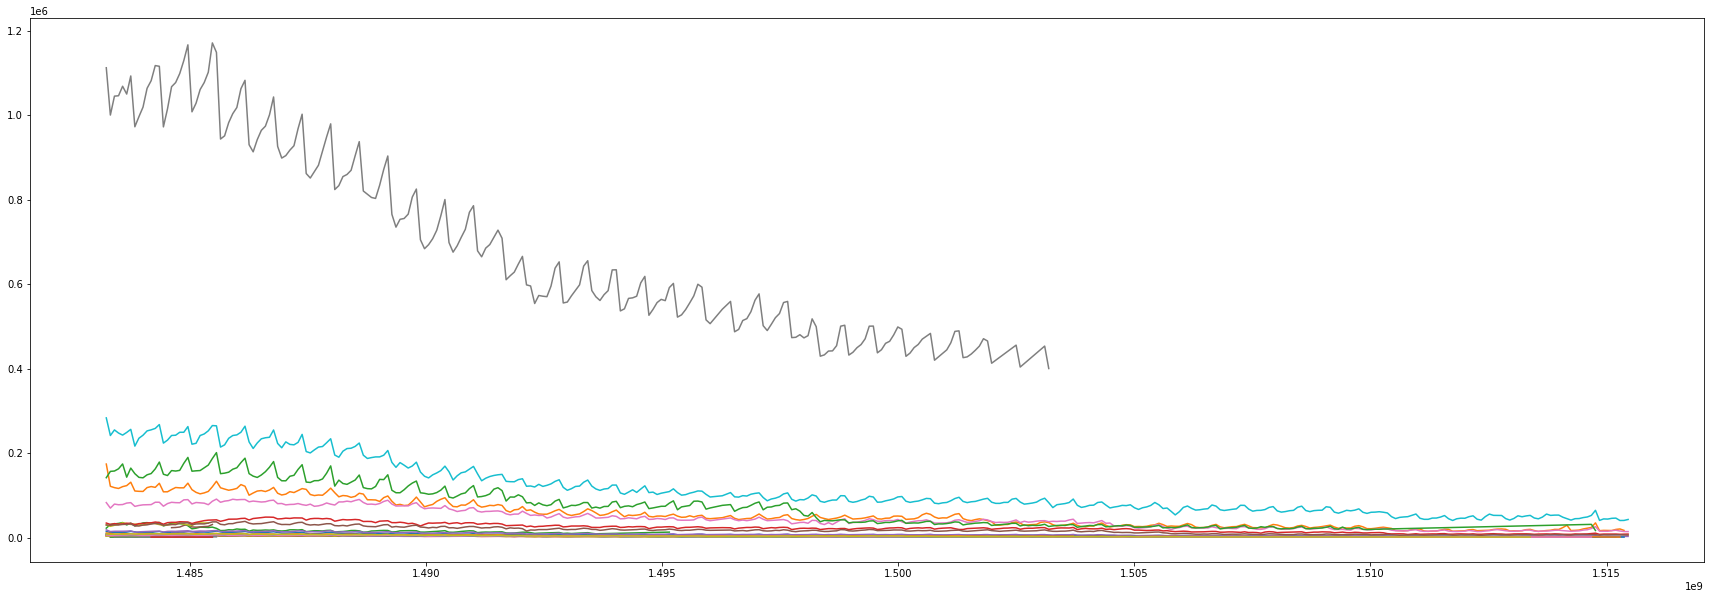

In [199]:
plt.figure(figsize=(30, 10))

for country in song['Region'].unique():
    country_df = song[song['Region'] == country]
    
    timestamps = country_df['Date'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d").timestamp())
    plt.plot(timestamps, country_df['Streams'])
plt.show()